# Intro to Machine Learning in Python

Learn how to get started training Neural Networks with keras


# Machine Learning Reminder
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  

# Outline
* Dense (Fully Connected Neural Networks)
  * Example Linear Fits
  * Classifications


# Packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lets start with a simple prediction a straight Line
data_dim=5

X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return 2*X[:,0]+1 #Ignore all other input have the output only depend on the first dimention
Y=func(X)




    
    

# Our first Layer
A Dense or fully connected layer

<img src="../assets/dense.png">

A dense layer has a connection between every input variable and every output node. Each connection is represented by a weight $W_{i,n}$ from and input $X_n$ to an output $O_i$. The output is a sum over all the input variables times there weights plus a bias $B_i$
<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

We will need to fit this to data, which means finding the best values for $W_{i,n}$ and $B_i$ to approximate our data.


In [3]:
# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
model=tf.keras.models.Model(input_layer,output_layer)


In the code above we define and Input layer and one Dense (Fully Connected Layer), in our equation above
i=1 n=data_dim
if data_dim ==1
then 

$O_i = \sum_n W_{i,n}*X_n+B_i  = O_0 =  W_{0,0}*X_0+B_0$

You'll notice from last lecture this is the same form as our linear model.

* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $

* Each 'neuron' in a dense network is one linear model

in neural network lingo 
*  $W$ is called the weight matrix 
*  $B$ the bias
*  $W$ is a matrix and can have several parameters and all the parameters in the network are often represented by just $\theta$ 

Just as in our Linear model we are going to use the same loss function
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* which is Mean Squared Error or mse for short
* and we will pick an optimizer 'adam'



In [4]:


#MSE= Mean Squared Error 
model.compile(loss='mse',optimizer='adam')

# Fit Our Simple Neural Network
# Stop fitting when the validation loss stops improving
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#Fit
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us




Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 2s 418us/step - loss: 384.5024 - val_loss: 309.4970
Epoch 2/100
5000/5000 [==============================] - 1s 117us/step - loss: 252.4420 - val_loss: 199.9693
Epoch 3/100
5000/5000 [==============================] - 1s 177us/step - loss: 160.2789 - val_loss: 125.0946
Epoch 4/100
5000/5000 [==============================] - 1s 230us/step - loss: 98.9418 - val_loss: 76.7281
Epoch 5/100
5000/5000 [==============================] - 1s 242us/step - loss: 60.3539 - val_loss: 47.3157
Epoch 6/100
5000/5000 [==============================] - 1s 229us/step - loss: 37.5752 - val_loss: 30.4758
Epoch 7/100
5000/5000 [==============================] - 1s 219us/step - loss: 25.0127 - val_loss: 21.5213
Epoch 8/100
5000/5000 [==============================] - 1s 220us/step - loss: 18.4711 - val_loss: 16.9304
Epoch 9/100
5000/5000 [==============================] - 1s 261us/step - loss: 15.1234 - v

5000/5000 [==============================] - 1s 270us/step - loss: 2.7594e-06 - val_loss: 2.1525e-06
Epoch 76/100
5000/5000 [==============================] - 1s 213us/step - loss: 1.6859e-06 - val_loss: 1.2869e-06
Epoch 77/100
5000/5000 [==============================] - 1s 214us/step - loss: 9.9309e-07 - val_loss: 7.8523e-07
Epoch 78/100
5000/5000 [==============================] - 1s 221us/step - loss: 5.7122e-07 - val_loss: 4.0396e-07
Epoch 79/100
5000/5000 [==============================] - 1s 242us/step - loss: 2.9928e-07 - val_loss: 2.1253e-07
Epoch 80/100
5000/5000 [==============================] - 1s 224us/step - loss: 1.5235e-07 - val_loss: 1.0790e-07
Epoch 81/100
5000/5000 [==============================] - 1s 240us/step - loss: 7.5477e-08 - val_loss: 5.0664e-08
Epoch 82/100
5000/5000 [==============================] - 1s 244us/step - loss: 3.3295e-08 - val_loss: 2.1132e-08
Epoch 83/100
5000/5000 [==============================] - 1s 248us/step - loss: 1.4226e-08 - val_loss

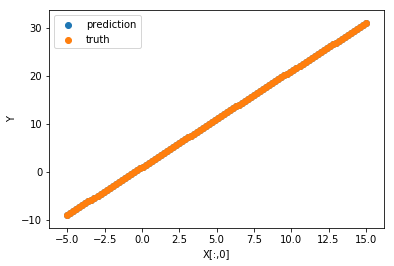

In [5]:
X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()



We can look at a models weights

In [6]:
weights=model.get_weights()
print(len(weights))
print(weights[0].shape,weights[1].shape)

print(weights[0])



2
(5, 1) (1,)
[[2.0000005e+00]
 [4.3147836e-08]
 [7.5945621e-08]
 [9.5167870e-08]
 [3.5379809e-08]]


We expect $W_{0,0}$=2, and $B_0$=1

In [7]:
print("W=",weights[0])
print("W[0,0]=",weights[0][0,0])
print("B=",weights[1])


W= [[2.0000005e+00]
 [4.3147836e-08]
 [7.5945621e-08]
 [9.5167870e-08]
 [3.5379809e-08]]
W[0,0]= 2.0000005
B= [0.9999972]


Lets try something a bit more complicated a sin wave

In [8]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)


In [9]:

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.compile(loss='mse',optimizer='adam')
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us





Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 160us/step - loss: 21.1620 - val_loss: 14.2159
Epoch 2/100
5000/5000 [==============================] - 1s 126us/step - loss: 12.2547 - val_loss: 10.6586
Epoch 3/100
5000/5000 [==============================] - 1s 126us/step - loss: 9.6372 - val_loss: 8.4416
Epoch 4/100
5000/5000 [==============================] - 1s 126us/step - loss: 7.5222 - val_loss: 6.4866
Epoch 5/100
5000/5000 [==============================] - 1s 127us/step - loss: 5.7189 - val_loss: 4.8706
Epoch 6/100
5000/5000 [==============================] - 1s 126us/step - loss: 4.2415 - val_loss: 3.5753
Epoch 7/100
5000/5000 [==============================] - 1s 127us/step - loss: 3.0946 - val_loss: 2.5856
Epoch 8/100
5000/5000 [==============================] - 1s 128us/step - loss: 2.2335 - val_loss: 1.8595
Epoch 9/100
5000/5000 [==============================] - 1s 119us/step - loss: 1.6131 - val_loss: 1.3535
Epo

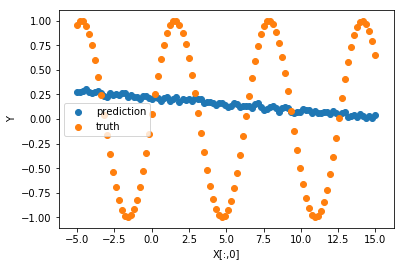

In [10]:
X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


Oops this didn't work. So far what we wrote above can only be linear

<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

we need to add something called an activation function $\sigma$

<p style="text-align: center;">
$O_i = \sigma(\sum_n W_{i,n}*X_n+B_i)$    
</p>

$\sigma$ has to be non-linear and a good choice is a LeakyReLU

<img src='../assets/leakyReLU.png'>

Let's also make our model a bit more powerful, but adding more layers $l$

<p style="text-align: center;">
$O_i,o=X_i$
</p>
 
<p style="text-align: center;">  
$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$    
</p>


In [11]:
input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='mse',optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                120       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0         
__________

In [12]:
model.fit(X,Y,epochs=50,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


Train on 5000 samples, validate on 5000 samples
Epoch 1/50
5000/5000 [==============================] - 1s 291us/step - loss: 0.5749 - val_loss: 0.4421
Epoch 2/50
5000/5000 [==============================] - 1s 211us/step - loss: 0.4287 - val_loss: 0.4042
Epoch 3/50
5000/5000 [==============================] - 1s 210us/step - loss: 0.3888 - val_loss: 0.3658
Epoch 4/50
5000/5000 [==============================] - 1s 210us/step - loss: 0.3581 - val_loss: 0.3293
Epoch 5/50
5000/5000 [==============================] - 1s 211us/step - loss: 0.3215 - val_loss: 0.3154
Epoch 6/50
5000/5000 [==============================] - 1s 211us/step - loss: 0.2917 - val_loss: 0.2742
Epoch 7/50
5000/5000 [==============================] - 1s 212us/step - loss: 0.2582 - val_loss: 0.2456
Epoch 8/50
5000/5000 [==============================] - 1s 210us/step - loss: 0.2342 - val_loss: 0.2186
Epoch 9/50
5000/5000 [==============================] - 1s 209us/step - loss: 0.2160 - val_loss: 0.2166
Epoch 10/50
5000

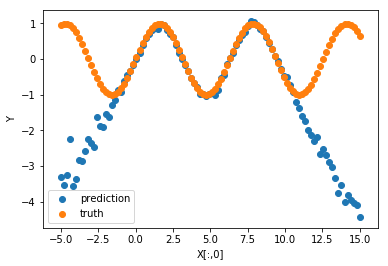

In [13]:

X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


The data fits the sin curve perfectly where it had seen training data 0-10, and not so well where there was no training data. Neural networks are universal function approximators, you have little control of what they predict when given data that is completely new. 


# Dense network summary

* Dense networks take fixed length input and have a fixed length output
* Like All Neural Network layers they require an activation function
* They can be stacked to represent more complicated functions
* You're taking your chances when predicting data that's very different from you're training data


# A Real World Example
We're going to use a number of measured values to try and predict good wine.
Source:https://archive.ics.uci.edu/ml/datasets/Wine+Quality (Cortez et al., 2009)

* Goal: Predict whether a wine is excellent based score given to the wine by an expert panel (1-10)
    * Score > 5 Excellent
    * Score <=5 Average

* Features:
  * 1 - fixed acidity
  * 2 - volatile acidity
  * 3 - citric acid
  * 4 - residual sugar
  * 5 - chlorides
  * 6 - free sulfur dioxide
  * 7 - total sulfur dioxide
  * 8 - density
  * 9 - pH
  * 10 - sulphates
  * 11 - alcohol
  * 12 - Red/White

# Classification

This is a classification problem each of our example belongs to an excellent class or an average class. Since Neural networks are universal function approximators, we can use

$P(y|x)$

binary cross-entropy

$L=y_{true}*ln(y_pred)-(1-y_{true})$


* if you're curious

This is essentially the log likelihood of a Bernoulli distribution

$P(y,k)=p_{true}^{k}(1-p_{k})^{1-y}$

$ln(P(y,k))=ln(p_{true}^{k}(1-p_{k})^{1-y}$)=



In [14]:
import winedata
import importlib
importlib.reload(winedata)


wd=winedata.WineData()
print(wd.x_train.shape,wd.y_train.shape)

(4561, 12) (4561,)


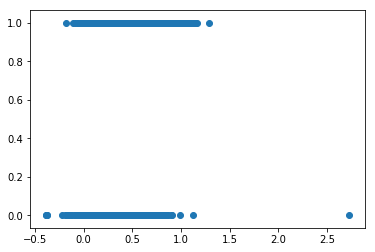

In [17]:
pred=model.predict(wd.x_develop)
plt.scatter(pred,wd.y_develop)

In [18]:
wd.y_develop


array([False,  True, False, ..., False, False,  True])

In [19]:
input_layer=tf.keras.layers.Input(shape=(12,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(50)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)
nn = tf.keras.layers.Dense(50)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)
nn = tf.keras.layers.Dense(50)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)

output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                650       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
__________

In [20]:
model.fit(wd.x_train,wd.y_train,epochs=50,validation_data=(wd.x_develop,wd.y_develop),callbacks=[es]) #Have Keras make a test/validation split for us


Train on 4561 samples, validate on 1936 samples
Epoch 1/50
4561/4561 [==============================] - 2s 485us/step - loss: 2.8997 - acc: 0.5448 - val_loss: 0.7570 - val_acc: 0.6410
Epoch 2/50
4561/4561 [==============================] - 2s 348us/step - loss: 1.2214 - acc: 0.5457 - val_loss: 0.6567 - val_acc: 0.6410
Epoch 3/50
4561/4561 [==============================] - 2s 337us/step - loss: 0.9102 - acc: 0.5538 - val_loss: 0.6513 - val_acc: 0.6410
Epoch 4/50
4561/4561 [==============================] - 1s 328us/step - loss: 0.7907 - acc: 0.5819 - val_loss: 0.6504 - val_acc: 0.6410
Epoch 5/50
4561/4561 [==============================] - 2s 348us/step - loss: 0.7512 - acc: 0.5801 - val_loss: 0.6514 - val_acc: 0.6415
Epoch 6/50
4561/4561 [==============================] - 2s 345us/step - loss: 0.7136 - acc: 0.5856 - val_loss: 0.6485 - val_acc: 0.6410
Epoch 7/50
4561/4561 [==============================] - 2s 332us/step - loss: 0.7017 - acc: 0.5975 - val_loss: 0.6469 - val_acc: 0.6410


[[0.3]
 [0.4]
 [0.4]
 [0.4]
 [0.3]
 [0.2]
 [0.3]
 [0.3]
 [0.5]
 [0.6]]
[False  True False False False False False False  True  True]


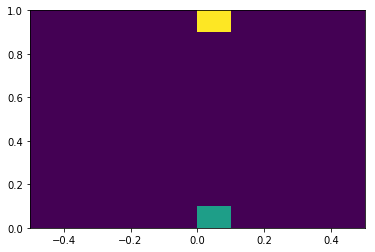

In [21]:
pred=model.predict(wd.x_develop)
print(np.round(pred[0:10],1))

#print(np.argmax(pred,axis=1).shape)
print(wd.y_develop[0:10])

plt.hist(np.argmax(pred))

plt.hist2d(np.argmax(pred,axis=1),wd.y_develop)
plt.show()


(1936, 1) (1936,)


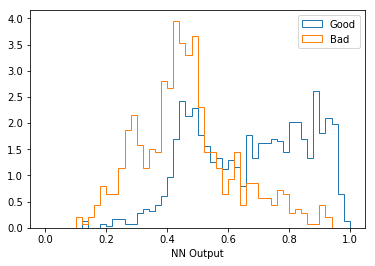

In [22]:
print(pred.shape,wd.y_develop.shape)

plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if i],bins=50,range=(0,1),density=True,histtype='step',label="Good")
plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if not i],bins=50,range=(0,1),density=True,histtype='step',label="Bad")

plt.legend()
plt.xlabel('NN Output')
plt.show()


(1936, 1)
429 1507


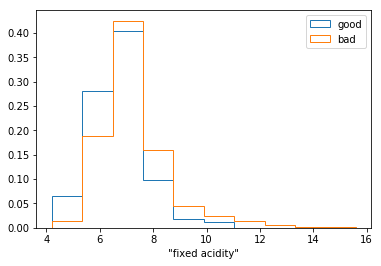

429 1507


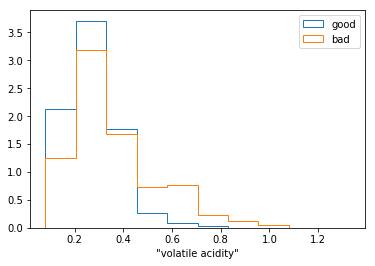

429 1507


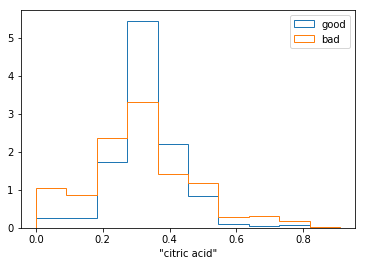

429 1507


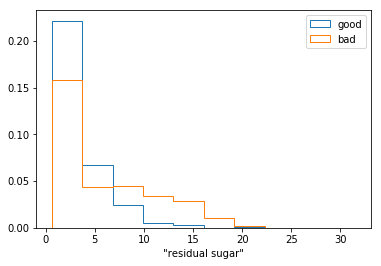

429 1507


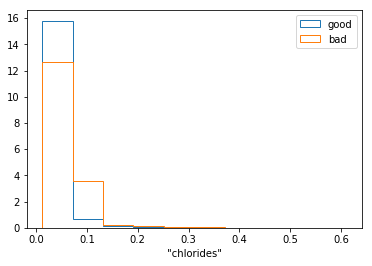

429 1507


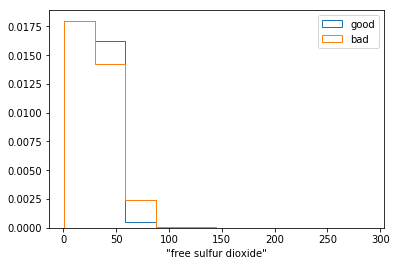

429 1507


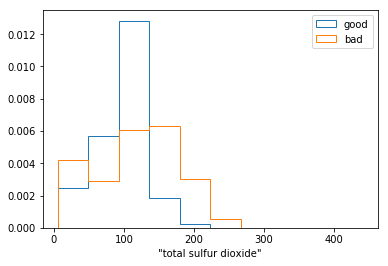

429 1507


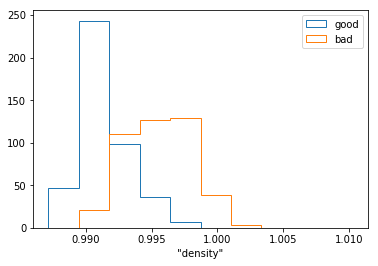

429 1507


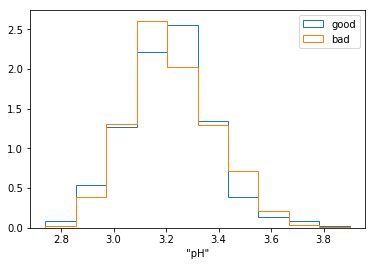

429 1507


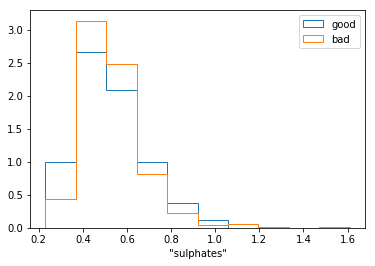

429 1507


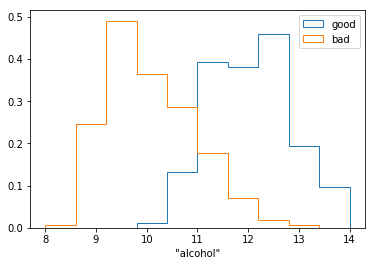

429 1507


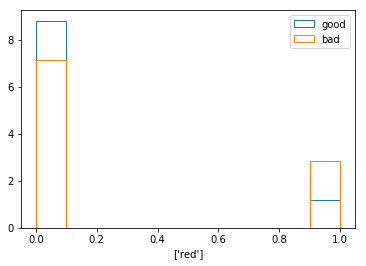

In [25]:
print(pred.shape)
for n in range(12):
    good=[]
    bad=[]
    for i,v in enumerate(pred[:,0]):
        if v >.8:
            good.append(wd.x_develop[i,n])
        else:
            bad.append(wd.x_develop[i,n])
    print(len(good),len(bad))
    label=wd.header[n]
    max_range=max([max(good),max(bad)])
    min_range=min([min(good),min(bad)])
    
    plt.hist(good,density=True,histtype='step',label='good',range=(min_range,max_range),bins=10)
    plt.hist(bad,density=True,histtype='step',label='bad',range=(min_range,max_range),bins=10)
    plt.xlabel(label)
    plt.legend()
    plt.show()

(1936,)
1241 695


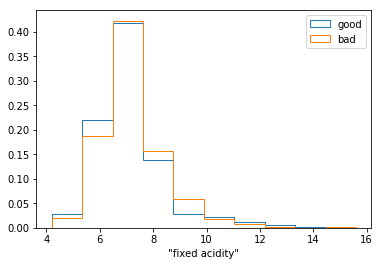

1241 695


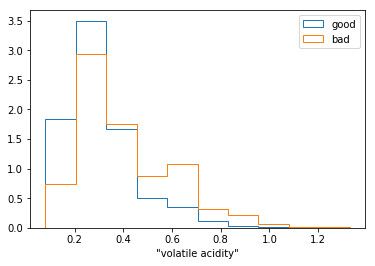

1241 695


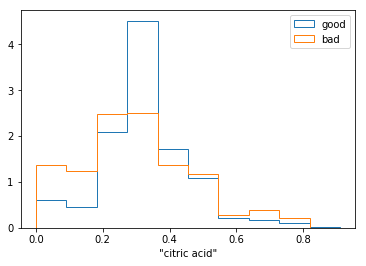

1241 695


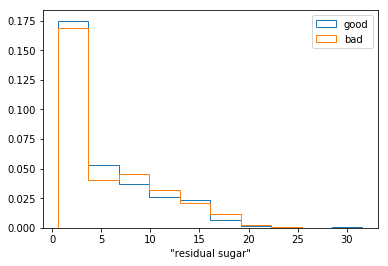

1241 695


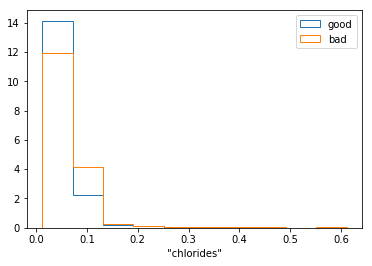

1241 695


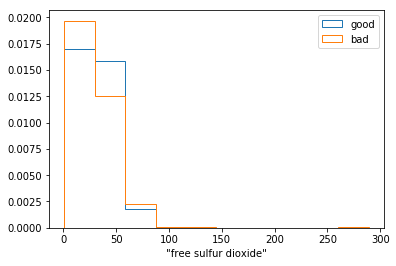

1241 695


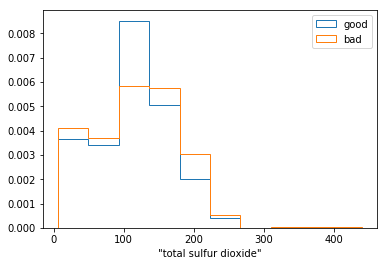

1241 695


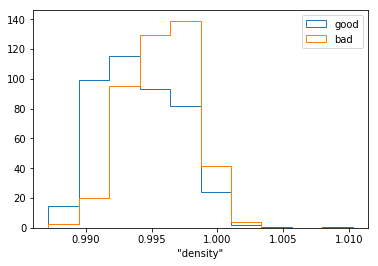

1241 695


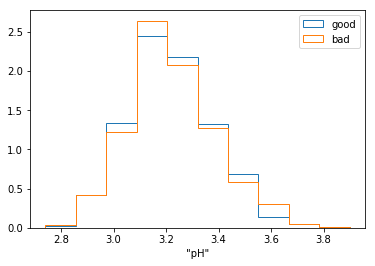

1241 695


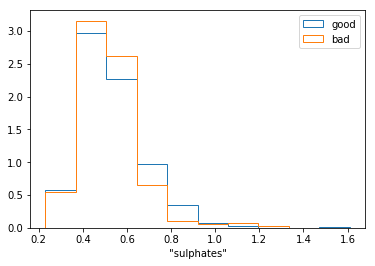

1241 695


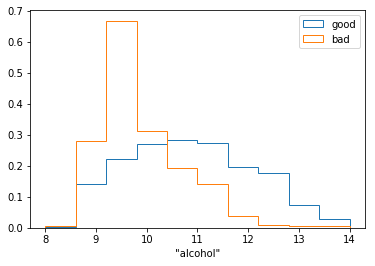

1241 695


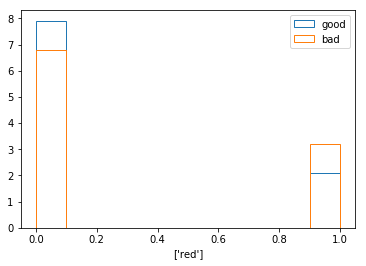

In [29]:
print(wd.y_develop.shape)
for n in range(12):
    good=[]
    bad=[]
    for i,v in enumerate(wd.y_develop):
        if v >.8:
            good.append(wd.x_develop[i,n])
        else:
            bad.append(wd.x_develop[i,n])
    print(len(good),len(bad))
    label=wd.header[n]
    max_range=max([max(good),max(bad)])
    min_range=min([min(good),min(bad)])
    
    plt.hist(good,density=True,histtype='step',label='good',range=(min_range,max_range),bins=10)
    plt.hist(bad,density=True,histtype='step',label='bad',range=(min_range,max_range),bins=10)
    plt.xlabel(label)
    plt.legend()
    plt.show()